The dataset can be obtained here: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from src.algorithms.decision_tree.decision_tree_regressor import DecisionTreeRegressor
from src.algorithms.random_forest.random_forest_regressor import RandomForestRegressor
from src.algorithms.gradient_boosting.gradient_boosting_regressor import GradientBoostingRegressor

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']
df = pd.read_csv("iris.csv", skiprows=1, header=None, names=col_names).drop('type', axis = 1)

In [43]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


In [44]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
regressor.fit(X_train, y_train)
regressor.print_tree()

X idx: 2  <=  1.9  ? | Info gain:  0.44179999999999997
 left: X idx: 2  <=  1.5  ? | Info gain:  0.0006150612305854234
  left: X idx: 1  <=  4.2  ? | Info gain:  0.0002810035842293912
    left: X idx: 1  <=  3.3  ? | Info gain:  0.00015766716943187522
        left: 0.18461538461538465
        right: 0.23529411764705882
    right: 0.4
  right: X idx: 1  <=  3.4  ? | Info gain:  0.00036296296296296277
    left: X idx: 0  <=  5.0  ? | Info gain:  0.00022500000000000008
        left: 0.20000000000000004
        right: 0.35
    right: X idx: 0  <=  5.0  ? | Info gain:  0.0004444444444444443
        left: 0.6
        right: 0.3333333333333333
 right: X idx: 2  <=  4.7  ? | Info gain:  0.07459556096794469
  left: X idx: 2  <=  4.1  ? | Info gain:  0.005155572983697985
    left: X idx: 2  <=  3.8  ? | Info gain:  0.001375744047619047
        left: 1.0285714285714285
        right: 1.2333333333333334
    right: X idx: 2  <=  4.4  ? | Info gain:  0.0011430014430014424
        left: 1.32000000000

In [45]:
y_pred_train = regressor.predict(X_train) 
np.sqrt(mean_squared_error(y_train, y_pred_train))

0.15212070648750395

In [46]:
y_pred_test = regressor.predict(X_test) 
np.sqrt(mean_squared_error(y_test, y_pred_test))

0.20537823921126108

In [47]:
regressor.feature_importance()

{2: 0.5246849406728485, 1: 0.011637189579796382, 0: 0.0034809104050977104}

In [48]:
regressor.feature_importance('n_splits')

{2: 6, 1: 4, 0: 4}

In [49]:
rf_regressor = RandomForestRegressor(100, 3, 3, criterion = 'variance', max_features=3)
rf_regressor.fit(X_train, y_train)

In [50]:
y_pred_test_rf = rf_regressor.predict(X_test)
y_pred_test_rf 
np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

0.22418944342411437

In [51]:
rf_regressor.feature_importance()

{0: 0.12130516473639208, 1: 0.04058324519731471, 2: 0.34307221085158707}

In [52]:
rf_regressor.feature_importance('n_splits')

{0: 3.95, 1: 4.33, 2: 4.81}

In [53]:
rf_regressor.feature_importance()

{0: 0.12130516473639208, 1: 0.04058324519731471, 2: 0.34307221085158707}

In [54]:
n_estimators = 40
min_samples_split = 3
max_depth = 3
learning_rate = 0.1

gradientboosting = GradientBoostingRegressor(n_estimators=n_estimators, 
                                             min_samples_split=min_samples_split, 
                                             max_depth=max_depth, 
                                             criterion='variance', 
                                             learning_rate=learning_rate)
gradientboosting.fit(X_train, y_train)

y_pred_test_gb  = gradientboosting.predict(X_test)

print('RMSE GB:', np.sqrt(mean_squared_error(y_test, y_pred_test_gb)))


RMSE GB: 0.20308066977228664


In [55]:
print(gradientboosting.feature_importance())

{0: 0.0012875237608499068, 1: 0.002238701457472934, 2: 0.06957153133260251}


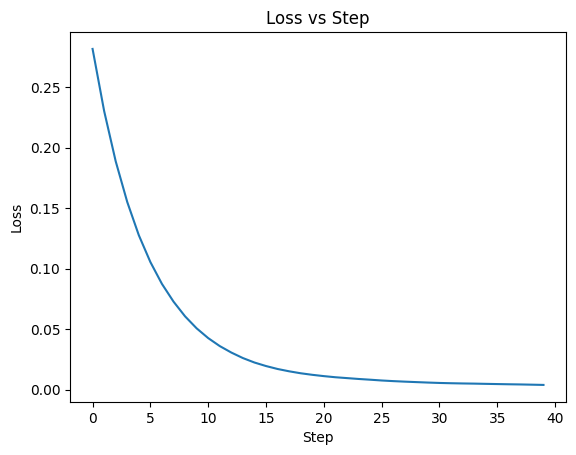

In [56]:
fig, ax = plt.subplots()
ax.plot(range(n_estimators), gradientboosting.losses)
ax.set_xlabel('Step')
ax.set_ylabel('Loss')
ax.set_title('Loss vs Step')
plt.show()

In [57]:
from sklearn.ensemble import GradientBoostingRegressor as GradientBoostingRegressorSK

modelSK = GradientBoostingRegressorSK(n_estimators=n_estimators, 
                                      min_samples_split=min_samples_split, 
                                      max_depth=max_depth, 
                                      criterion='squared_error', 
                                      learning_rate=learning_rate)
modelSK.fit(X_train, y_train.reshape(-1,))

y_predSK = modelSK.predict(X_test)
print('RMSE sklearn:', np.sqrt(mean_squared_error(y_test, y_predSK)))

RMSE sklearn: 0.2183879603996319
